In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from artemis.interactions_methods.model_agnostic import FriedmanHStatisticMethod, GreenwellMethod, SejongOhMethod
from artemis.interactions_methods.model_specific import ConditionalMinimalDepthMethod, SplitScoreMethod
import matplotlib.pyplot as plt

In [2]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
model = RandomForestRegressor(n_estimators=80, max_depth=12).fit(X, y)

### Greenwell Method

In [5]:
vint = GreenwellMethod()
vint.fit(model, X, 100, show_progress=True) 

Calculating feature importance: 100%|██████████| 8/8 [00:00<00:00,  8.28it/s]


In [6]:
vint.ovo

,Feature 1,Feature 2,Greenwell Variable Interaction Measure
0,MedInc,AveOccup,0.138602
1,Latitude,Longitude,0.112209
2,HouseAge,AveOccup,0.091302
3,MedInc,Latitude,0.090604
4,MedInc,HouseAge,0.064018
5,MedInc,Longitude,0.063910
6,AveOccup,Latitude,0.057604
7,MedInc,Population,0.039760
8,AveOccup,Longitude,0.034907
9,MedInc,AveRooms,0.032930


In [7]:
vint.feature_importance

,Feature,Importance
0,MedInc,0.542571
1,Latitude,0.373240
2,Longitude,0.338227
3,AveOccup,0.277361
4,HouseAge,0.071277
5,AveRooms,0.049478
6,Population,0.048539
7,AveBedrms,0.028502


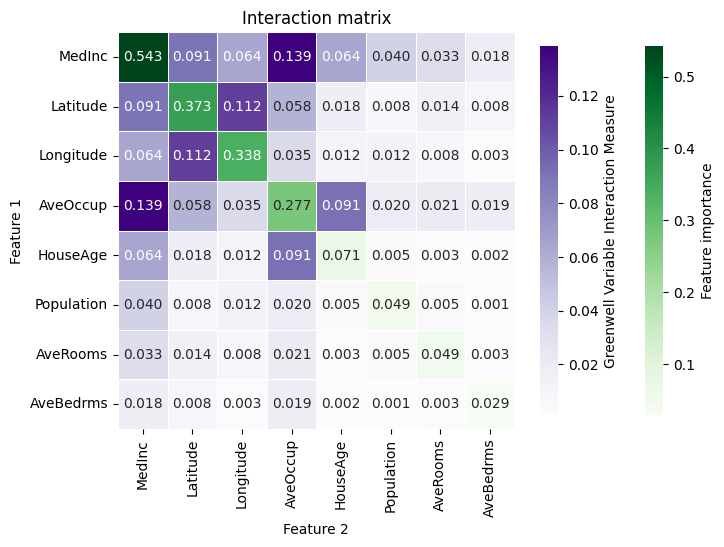

In [8]:
vint.plot(figsize=(8, 6)) 

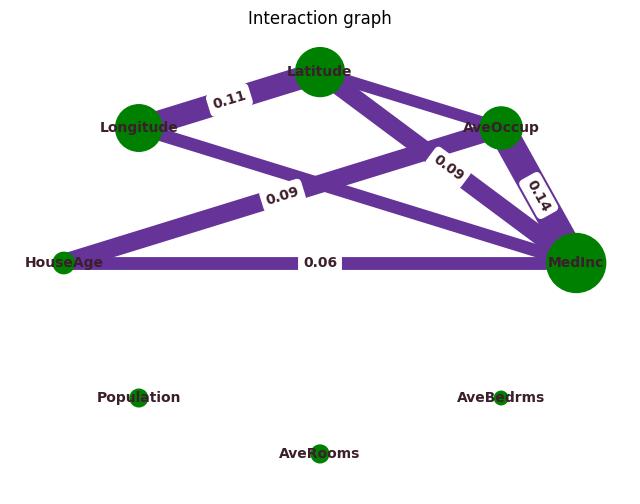

In [9]:
vint.plot("graph")  

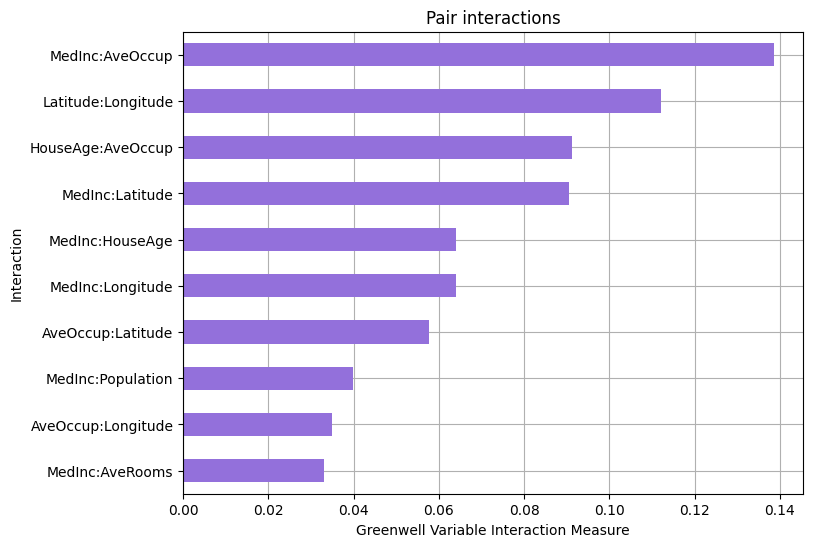

In [10]:
vint.plot("bar_chart")

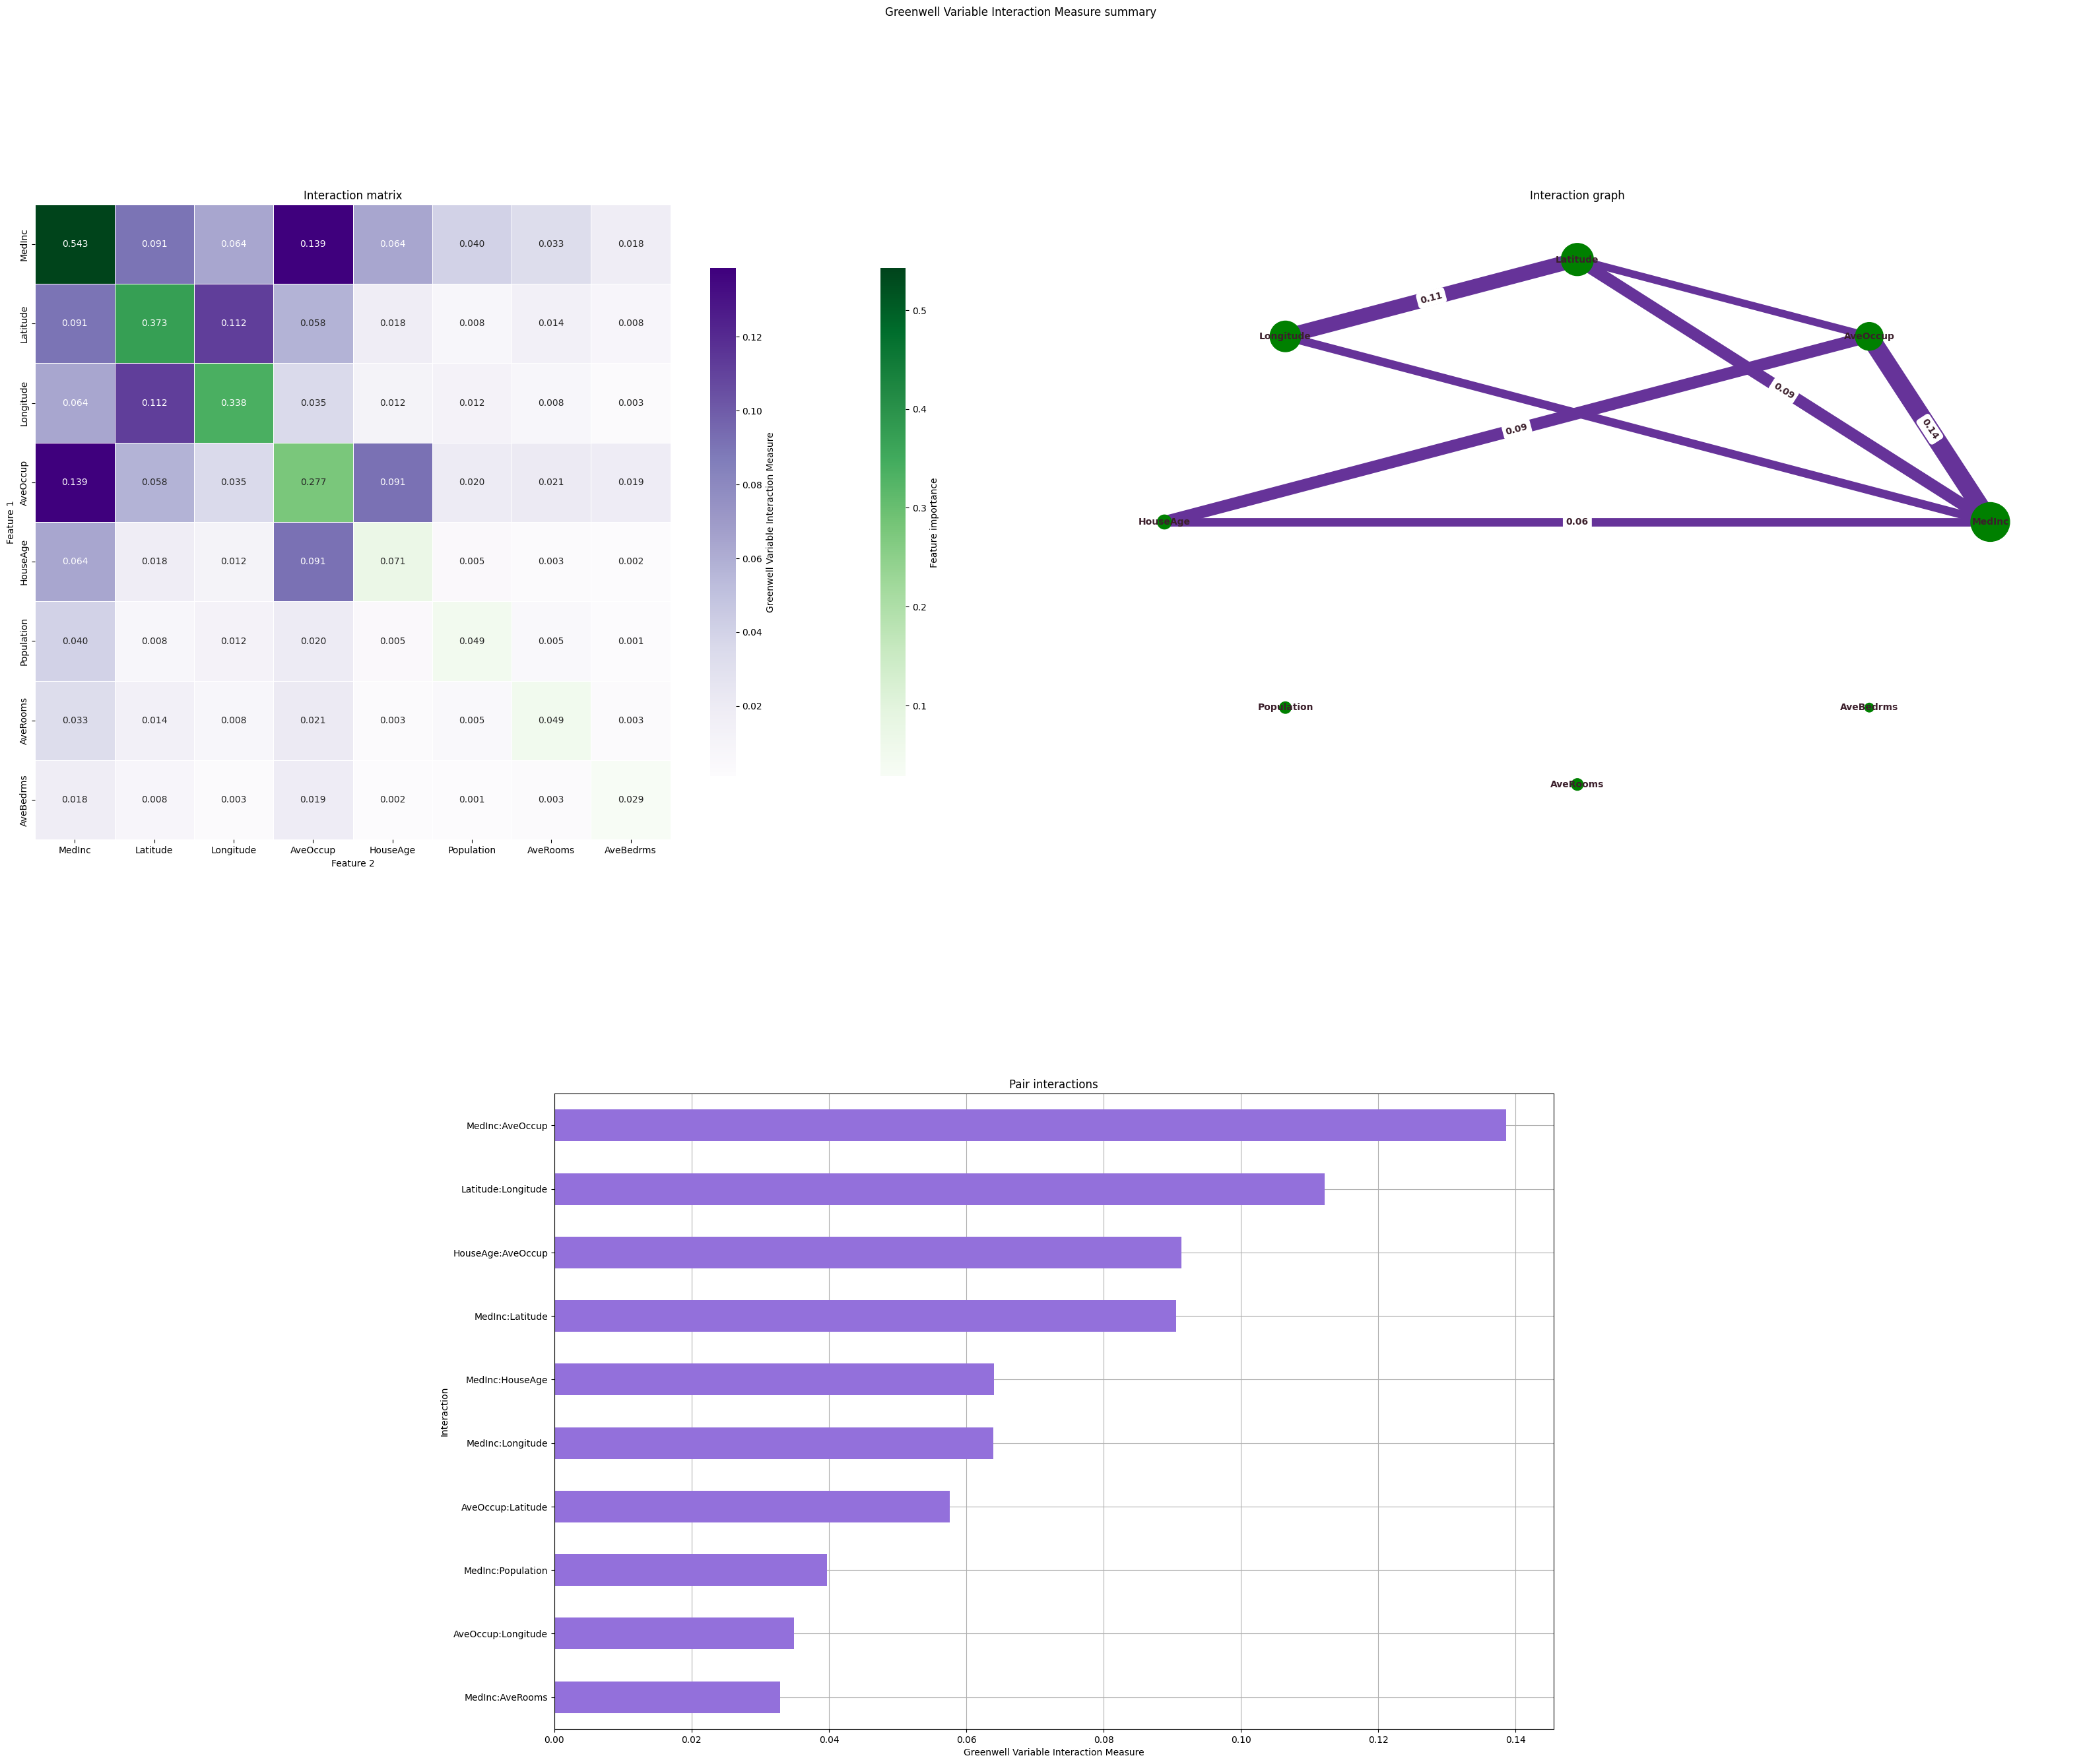

In [11]:
vint.plot("summary")

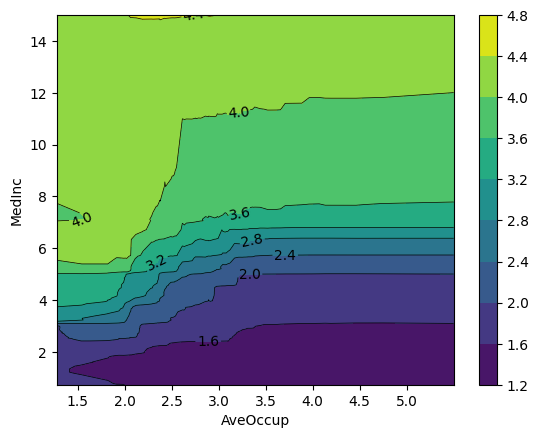

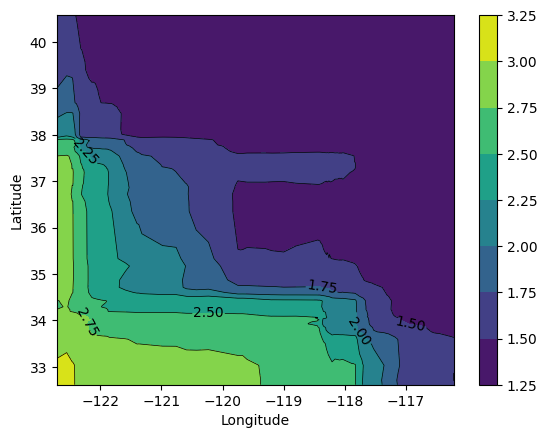

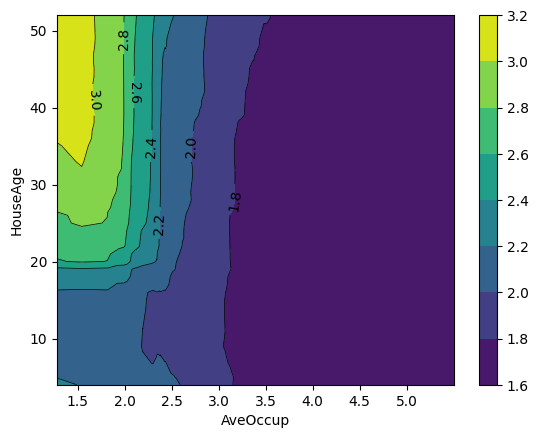

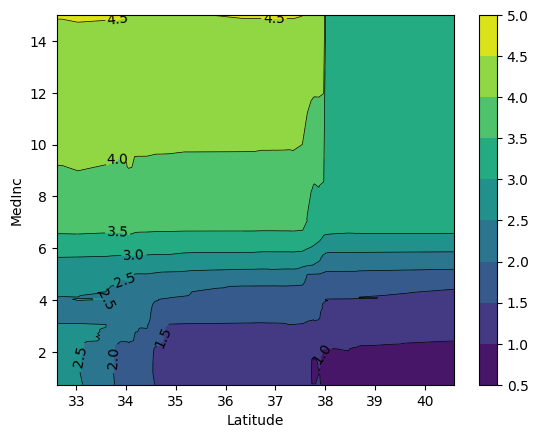

In [12]:
best_pairs = vint.ovo.iloc[:4, :2]
for i, row in best_pairs.iterrows():
    plt.figure()
    vint.plot_profile(row["Feature 1"], row["Feature 2"])

In [13]:
vint_subset = GreenwellMethod()
vint_subset.fit(model, X, 5, features=["Latitude", "Longitude", "HouseAge"],
                show_progress=True)  # subset of features 

Calculating feature importance: 100%|██████████| 8/8 [00:00<00:00, 219.71it/s]


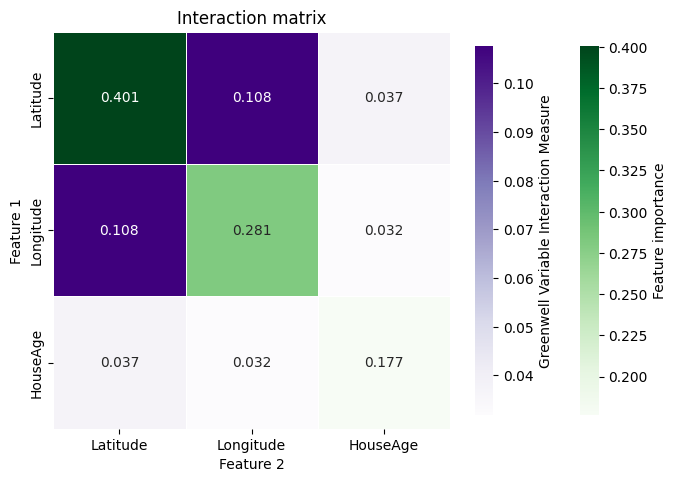

In [14]:
vint_subset.plot()

### H statistic

In [15]:
h_stat = FriedmanHStatisticMethod()
h_stat.fit(model, X, 500, show_progress=True)  # all features - FriedmanHStatistic

Calculating one vs all interactions: 100%|██████████| 8/8 [00:27<00:00,  3.44s/it]


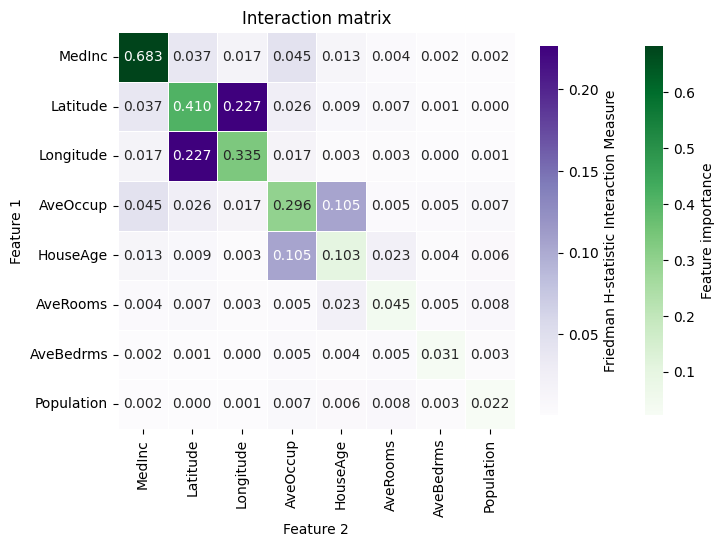

In [16]:
h_stat.plot()

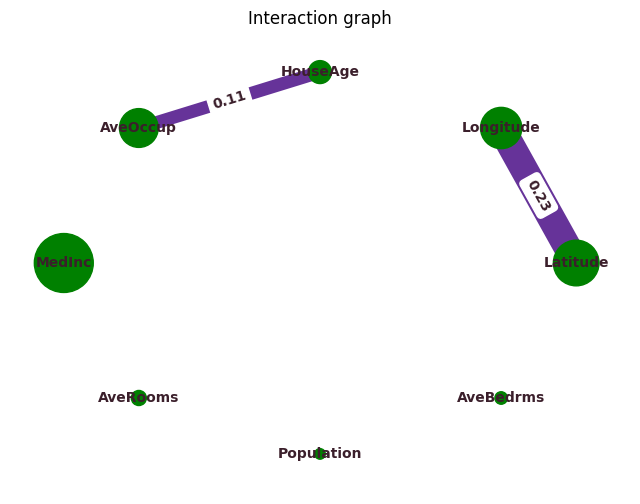

In [17]:
h_stat.plot("graph")

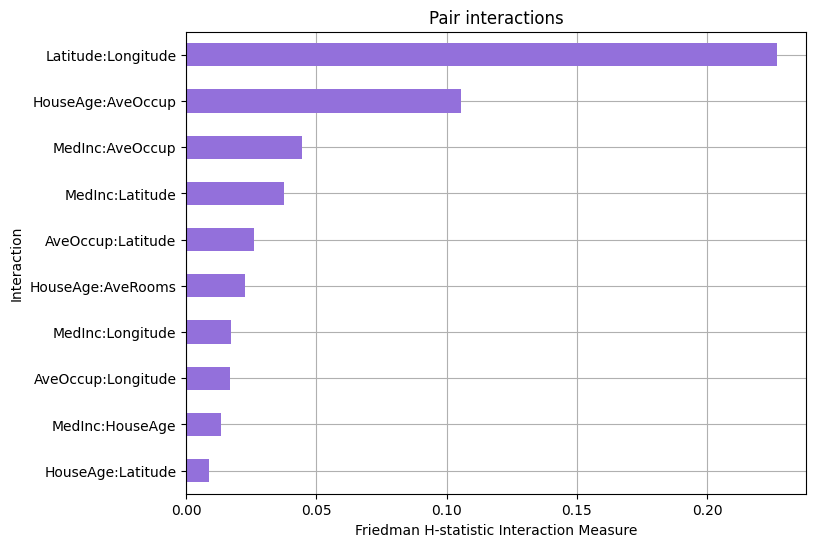

In [18]:
h_stat.plot("bar_chart")

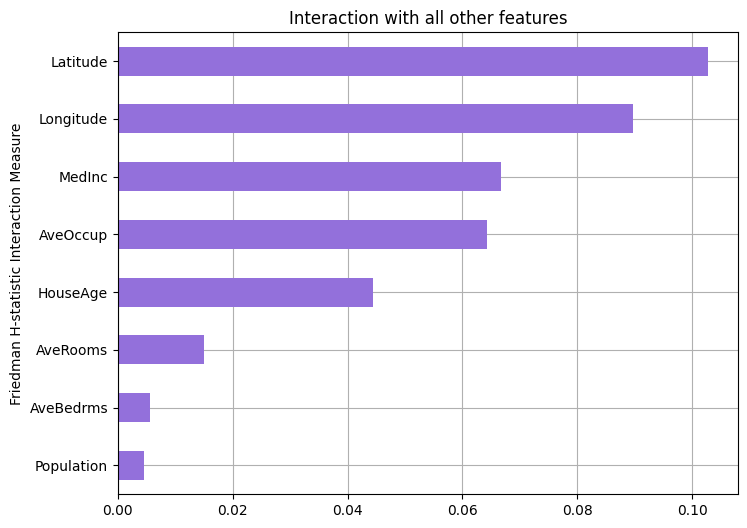

In [19]:
h_stat.plot("bar_chart_ova")

In [20]:
h_stat_subset = FriedmanHStatisticMethod()
h_stat_subset.fit(model, X, 10, features=["Latitude", "Longitude", "HouseAge"],
                  show_progress=True)  # subset of features - FriedmanHStatistic

Calculating one vs all interactions: 100%|██████████| 3/3 [00:00<00:00, 57.25it/s]


### Sejong Oh Method

In [21]:
perf_based = SejongOhMethod()
perf_based.fit(model, X, y, 1000, show_progress=True)

Calculating feature importance: 100%|██████████| 10/10 [00:01<00:00,  5.67it/s]


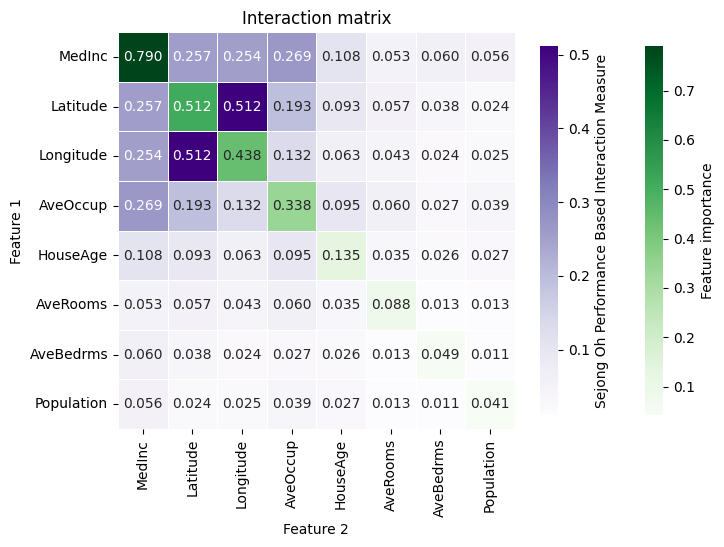

In [22]:
perf_based.plot() 

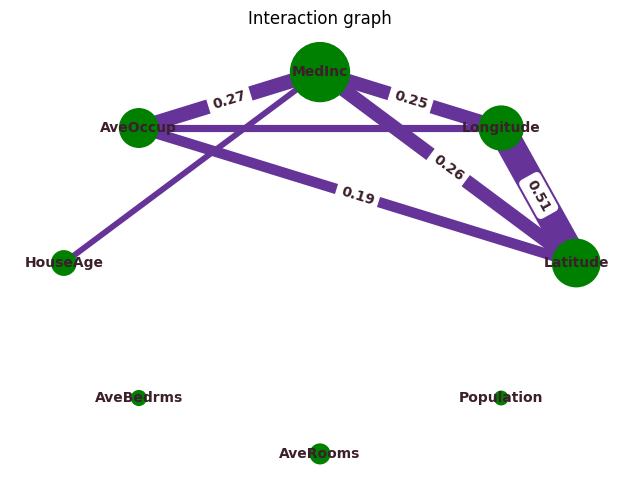

In [23]:
perf_based.plot("graph")  # interaction graph - SejongOhInteraction

In [24]:
perf_based_subset = SejongOhMethod()
perf_based_subset.fit(model, X, y, features=["Latitude", "Longitude", "HouseAge"],
               show_progress=True)  # subset of features - SejongOhInteraction

Calculating feature importance: 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]


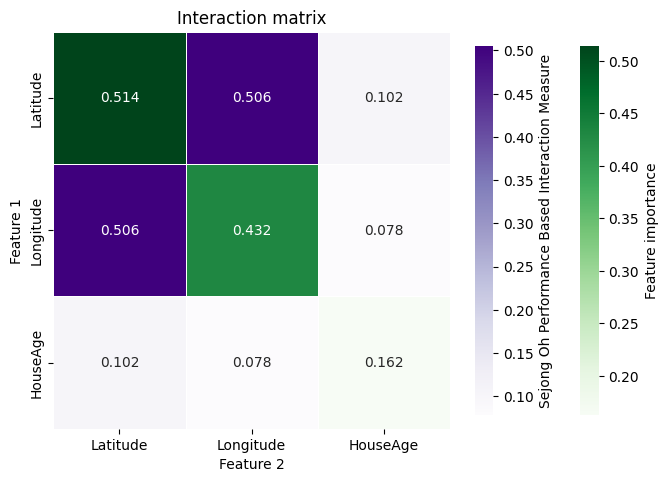

In [25]:
perf_based_subset.plot()

### Comparator

In [26]:
from artemis.comparison import FeatureInteractionMethodComparator

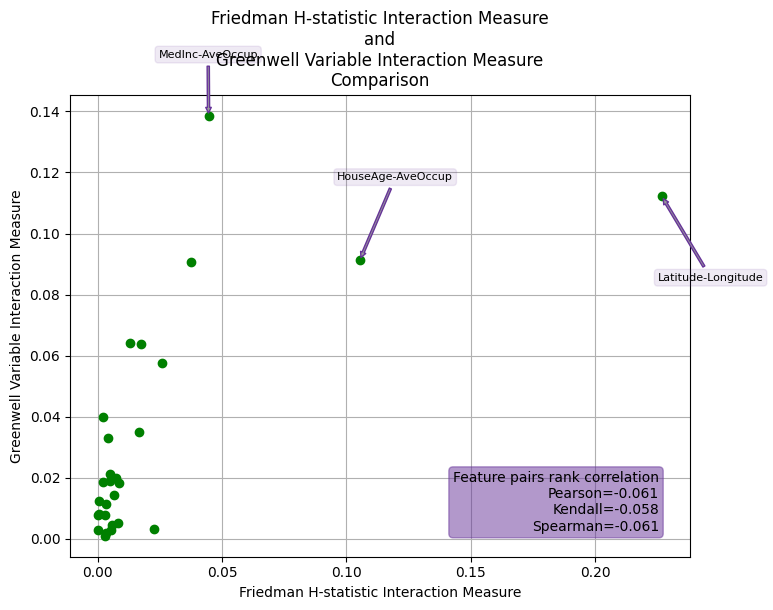

In [27]:
comparator = FeatureInteractionMethodComparator()
comparator.summary(h_stat, vint)

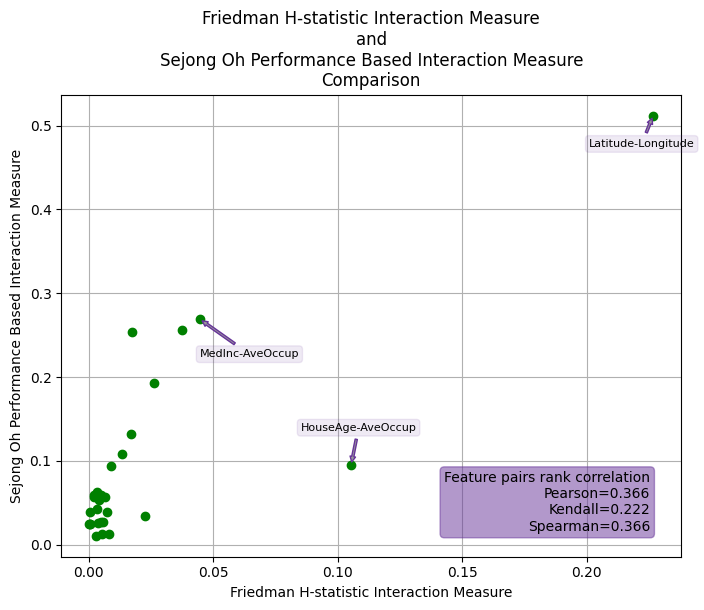

In [28]:
comparator.summary(h_stat, perf_based)

### Conditional Depth Method

In [29]:
model_rf = RandomForestRegressor(n_estimators=100, max_features="sqrt", max_depth=5).fit(X, y)
cond = ConditionalMinimalDepthMethod()
cond.fit(model_rf, show_progress=True)  

100%|██████████| 100/100 [00:02<00:00, 45.30it/s]


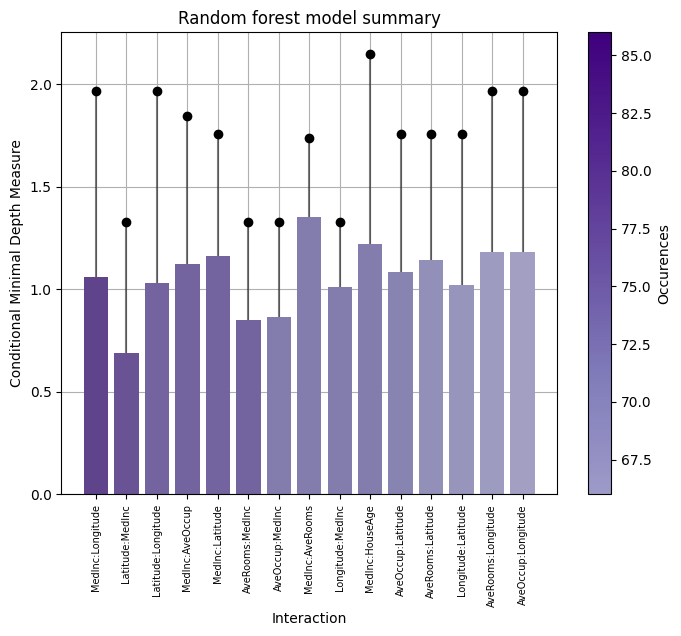

In [30]:
cond.plot("bar_chart_conditional")

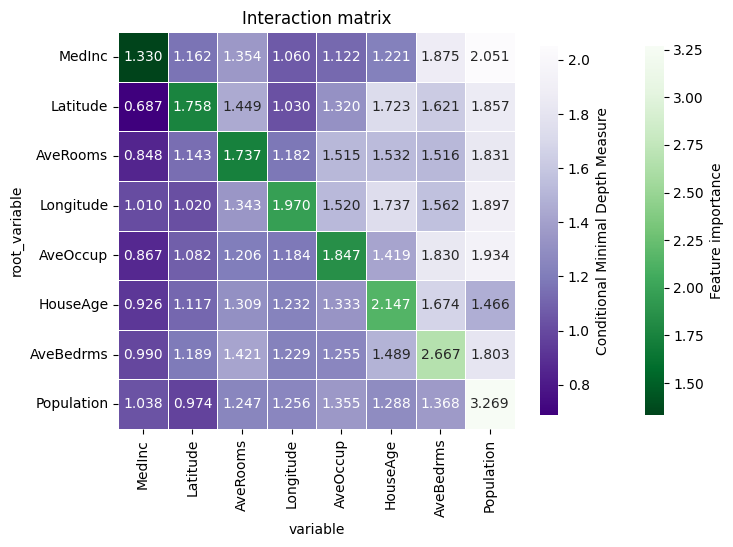

In [31]:
cond.plot()

### Split Score Method

In [32]:
from xgboost import XGBRegressor
model_gb = XGBRegressor(n_estimators=80, max_depth=4).fit(X, y)

In [33]:
split_score = SplitScoreMethod()
split_score.fit(model_gb, show_progress=True, interaction_selected_metric = "sum_gain",)

100%|██████████| 80/80 [00:03<00:00, 23.46it/s]


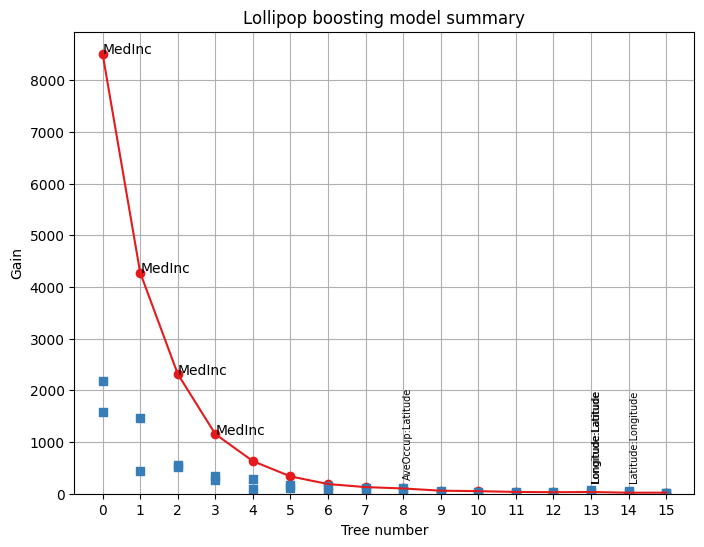

In [34]:
split_score.plot("lollipop", max_depth=1)

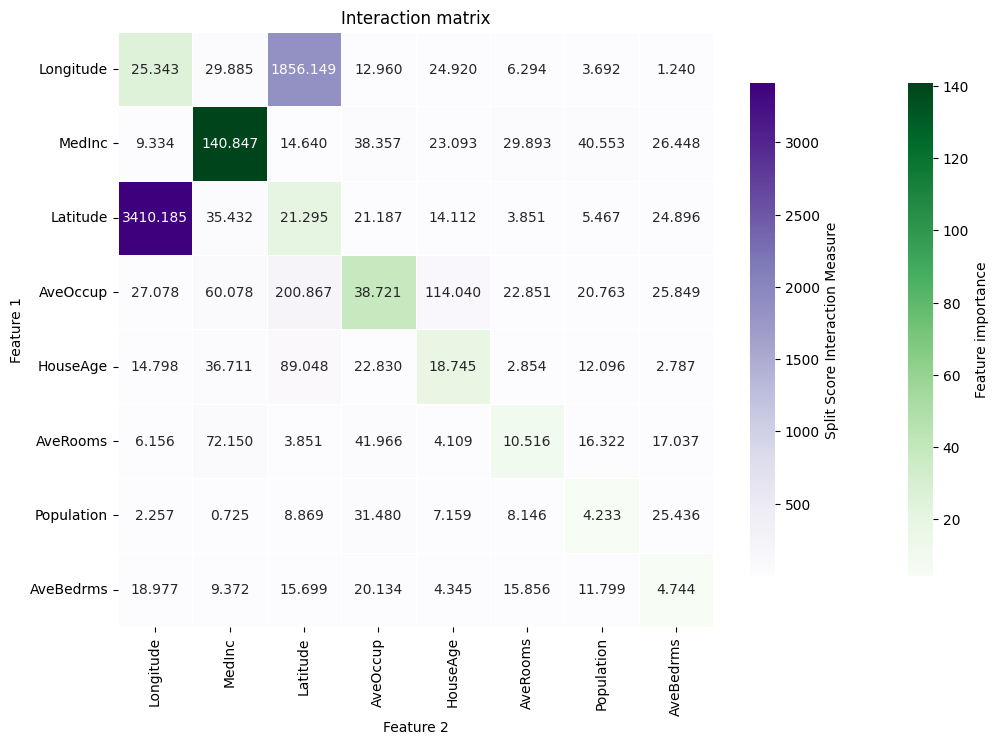

In [35]:
split_score.plot(figsize=(12, 8))

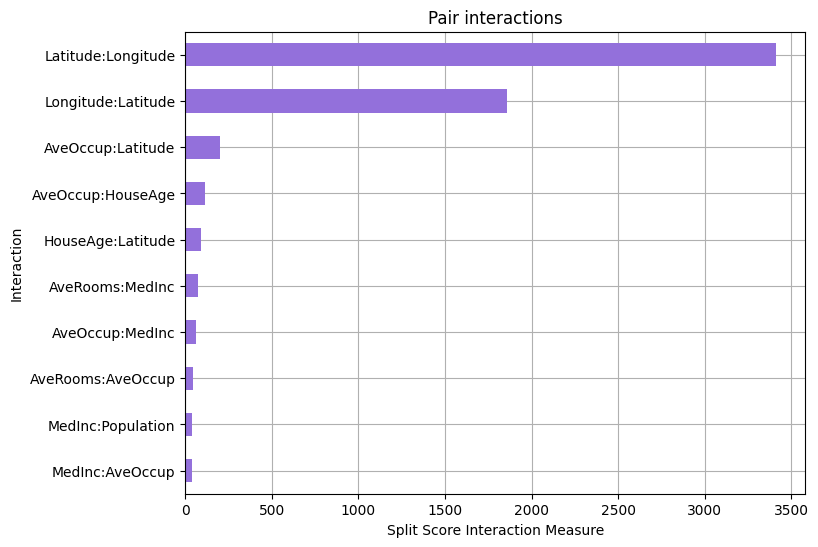

In [36]:
split_score.plot("bar_chart")

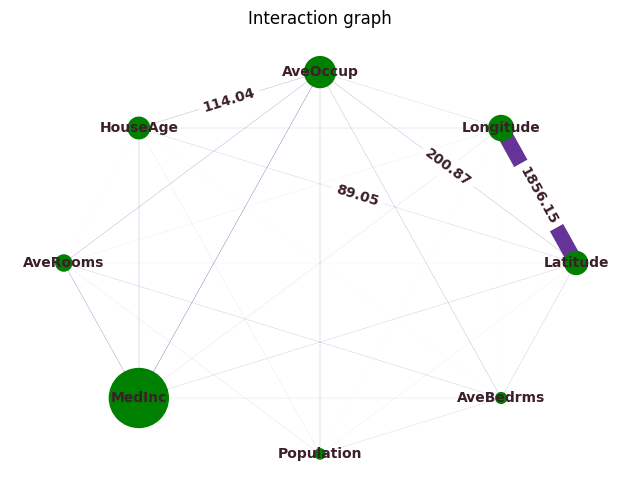

In [37]:
split_score.plot("graph")

### Additivity Meter

In [38]:
from sklearn.linear_model import LinearRegression
from artemis.additivity import AdditivityMeter

In [39]:
additivity_meter = AdditivityMeter()
additivity_meter.fit(model, X, n=500, show_progress=True)

Calculating additivity index of the model: 100%|██████████| 8/8 [00:18<00:00,  2.36s/it]


0.7644364076508475

In [40]:
additivity_meter.fit(model_gb, X, n=500, show_progress=True)

Calculating additivity index of the model: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]


0.5182349265646244

In [41]:
model_lin = LinearRegression().fit(X, y)
additivity_meter.fit(model_lin, X, n=500, show_progress=True)

Calculating additivity index of the model: 100%|██████████| 8/8 [00:10<00:00,  1.26s/it]


1.0